<a href="https://colab.research.google.com/github/deepak10281/Zomato-data-Analysis-using-python/blob/main/www.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pandas matplotlib seaborn plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlite3
from google.colab import files

In [12]:
def init_db():
    conn = sqlite3.connect('zomato data.csv.db')
    cursor = conn.cursor()

    # Create the restaurants table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS restaurants (
        id INTEGER PRIMARY KEY,
        name TEXT,
        cuisines TEXT,
        average_cost_for_two INTEGER,
        currency TEXT,
        has_table_booking INTEGER,
        has_online_delivery INTEGER,
        rating FLOAT,
        votes INTEGER
    )
    ''')

    # Sample data (replace this with actual Zomato data when available)
    sample_data = [
        ('Restaurant A', 'Italian', 1000, 'INR', 1, 1, 4.5, 1000),
        ('Restaurant B', 'Chinese', 800, 'INR', 0, 1, 4.0, 800),
        ('Restaurant C', 'Indian', 600, 'INR', 1, 0, 4.2, 1200),
        ('Restaurant D', 'Mexican', 1200, 'INR', 1, 1, 4.7, 1500),
        ('Restaurant E', 'Japanese', 1500, 'INR', 1, 0, 4.6, 900),
        ('Restaurant F', 'Italian', 1100, 'INR', 0, 1, 4.3, 1100),
        ('Restaurant G', 'Indian', 700, 'INR', 1, 1, 4.1, 950),
        ('Restaurant H', 'Chinese', 900, 'INR', 1, 0, 4.4, 1300),
        ('Restaurant I', 'Mexican', 1300, 'INR', 0, 1, 4.8, 1600),
        ('Restaurant J', 'Japanese', 1600, 'INR', 1, 1, 4.9, 1800),
    ]

    # Insert sample data
    cursor.executemany('''
    INSERT INTO restaurants (name, cuisines, average_cost_for_two, currency, has_table_booking, has_online_delivery, rating, votes)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', sample_data)

    # Commit changes and close the connection
    conn.commit()
    conn.close()

    print("Database initialized with sample data.")

# Initialize the database
init_db()

Database initialized with sample data.


In [13]:
def load_data():
    conn = sqlite3.connect('zomato data.csv.db')
    df = pd.read_sql_query("SELECT * FROM restaurants", conn)
    conn.close()
    return df

def basic_stats(df):
    stats = {
        'total_restaurants': len(df),
        'average_rating': df['rating'].mean(),
        'top_cuisine': df['cuisines'].mode().iloc[0],
    }
    return stats

def plot_top_cuisines(df):
    top_cuisines = df['cuisines'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
    plt.title('Top 10 Cuisines')
    plt.xlabel('Cuisine')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_rating_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['rating'], bins=20, kde=True)
    plt.title('Distribution of Restaurant Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

def plot_cost_vs_rating(df):
    fig = px.scatter(df, x='average_cost_for_two', y='rating', hover_data=['name', 'cuisines'],
                     title='Average Cost for Two vs. Rating')
    fig.show()

def plot_online_delivery_comparison(df):
    delivery_stats = df.groupby('has_online_delivery')['rating'].mean().reset_index()
    delivery_stats['has_online_delivery'] = delivery_stats['has_online_delivery'].map({0: 'No', 1: 'Yes'})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='has_online_delivery', y='rating', data=delivery_stats)
    plt.title('Average Rating: Online Delivery vs. No Online Delivery')
    plt.xlabel('Has Online Delivery')
    plt.ylabel('Average Rating')
    plt.show()

Basic Statistics:
{'total_restaurants': 30, 'average_rating': 4.45, 'top_cuisine': 'Chinese'}

Plotting Top Cuisines:


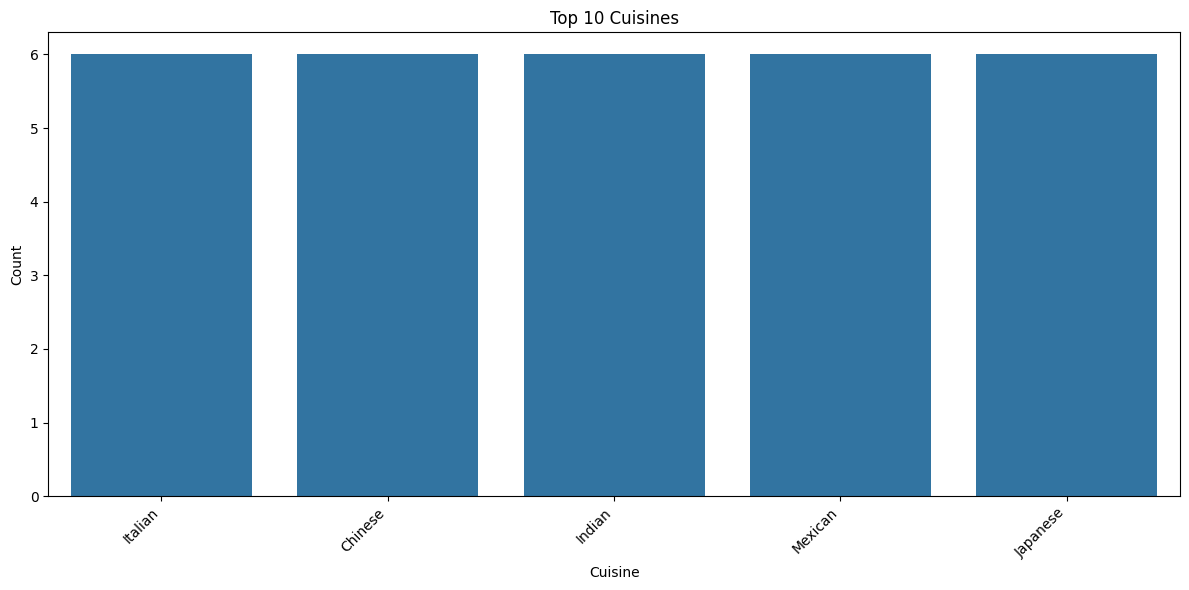


Plotting Rating Distribution:


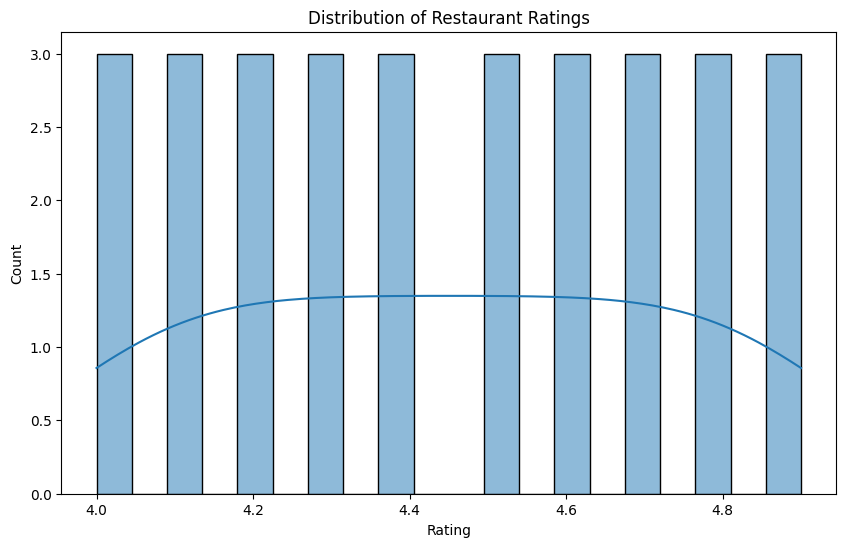


Plotting Cost vs. Rating:



Comparing Online Delivery:


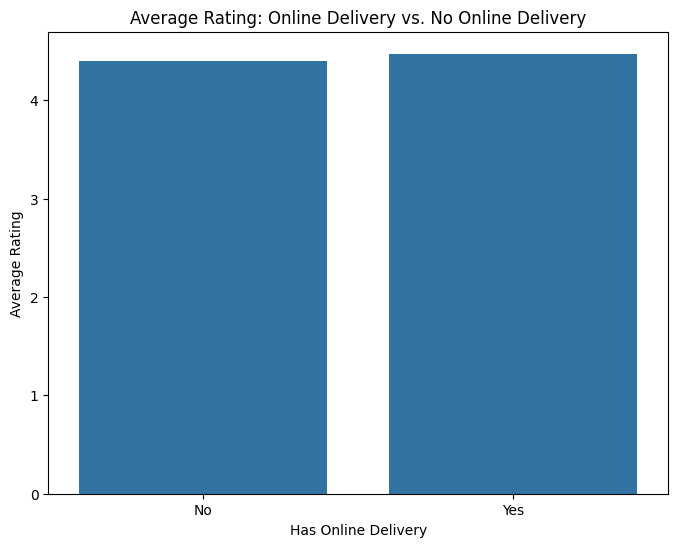

In [14]:
def main():
    df = load_data()

    print("Basic Statistics:")
    print(basic_stats(df))

    print("\nPlotting Top Cuisines:")
    plot_top_cuisines(df)

    print("\nPlotting Rating Distribution:")
    plot_rating_distribution(df)

    print("\nPlotting Cost vs. Rating:")
    plot_cost_vs_rating(df)

    print("\nComparing Online Delivery:")
    plot_online_delivery_comparison(df)

# Run the main function
main()